# Postier chinois

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Un exemple

Pour illuster, on utilise le problème tiré de [Shortest city tour](http://www.xavierdupre.fr/app/ensae_projects/helpsphinx/notebooks/city_tour_1.html#problem-definition).

In [ ]:
vertices = [(-122.34991548199997, 47.46763155800005),  (-122.34991155699998, 47.468532819000075),
 (-122.349907514, 47.469446668000046),  (-122.34855159499995, 47.47036031400006),
 (-122.34722154299999, 47.46765986400004),  (-122.34721743899996, 47.46856001400005),
 (-122.34721337199994, 47.466759281000066),  (-122.34721334599999, 47.46946425100003),
 (-122.34717558599999, 47.47218021800006),  (-122.34695634299999, 47.47037913100007),
 (-122.34651954599997, 47.46947199700003),  (-122.34602084699998, 47.46857181000007),
 (-122.34577976599996, 47.47219822000005),  (-122.34577761299994, 47.470393184000045),
 (-122.34552556999995, 47.46767758400006),  (-122.34451462099997, 47.46858890800007),
 (-122.34451260399999, 47.46949338600007),  (-122.34451061099998, 47.47040481700003)]

In [ ]:
edges = [(10, 7),  (5, 4),  (4, 0),  (10, 11),  (9, 10),  (7, 2),  (17, 16),  (5, 1),  (11, 5),  (17, 13),
 (16, 15),  (14, 4),  (15, 11),  (1, 0),  (4, 6),  (8, 9),  (13, 9),  (7, 5),  (11, 14),  (16, 10),  (2, 1),
 (12, 8),  (9, 3),  (12, 13)]

In [ ]:
longueurs = [0.0006938432391730961, 0.0009001593555190061, 0.0026940877056109824, 0.0010290953928001187, 0.0010111922517731158,
 0.0026942253755745885, 0.0009114331789785205, 0.002694255252624058, 0.001196650141037562, 0.0012670554031294153,
 0.000904480248963228, 0.001696065569270049, 0.0015063230412799549, 0.0009012695466891699, 0.0009006200670015617,
 0.0018143819538848289, 0.0011788137680839225, 0.0009042462633556375, 0.0010222227965844966, 0.0020070559761853316,
 0.0009138579433356185, 0.001395936081803295, 0.0015953629752697774, 0.0018050372840282547]

In [ ]:
class AShape:
    def __init__(self, points):
        self.points = points
shapes = [AShape([vertices[a], vertices[b]]) for a, b in edges]
edges_index = [i for i in range(len(edges))]

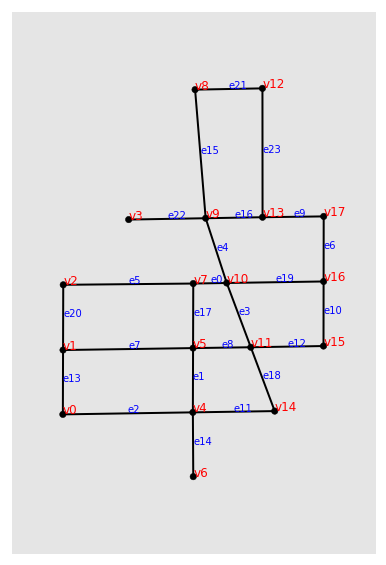

In [ ]:
from ensae_projects.data.data_geo_streets import plot_streets_network
plot_streets_network(edges_index, edges, vertices, shapes, figsize=(10,10))

On veut trouver le plus court chemin qui passe par toutes les rues ou segments de ce petit circuit.

## L'astuce

Plutôt que de commencer à se demander comment faire, réfléchissons d'abord à la question : est-ce que je peux déterminer la longueur minimum de ce trajet ? C'est la plus petite longueur possition en deça de laquelle on sait qu'on s'est trompé.

Comme on est obligé par toutes les rues, le plus court chemin possible passe par toutes les rues au moins une fois. Donc si on fait la somme de toutes les longueurs des rues, on obtient la longueur minimal. Cela ne vaut pas dire qu'on sait comment faire pour ne passer une et une fois par toutes les rues, mais on sait que la longueur ne peut pas être inférieure.

In [ ]:
sum(longueurs)

0.03363767081195559

*Est-ce qu'un tel chemin existe ?*

[Euler](https://fr.wikipedia.org/wiki/Leonhard_Euler) est un mathématicien qui a vécu au dix-huitième siècle. Il a réfléchi au problème des [sept ponts de Konigsberg](https://fr.wikipedia.org/wiki/Probl%C3%A8me_des_sept_ponts_de_K%C3%B6nigsberg). Comment faire une promenade dans la vie et passer une et une seule fois par tous les ponts ?

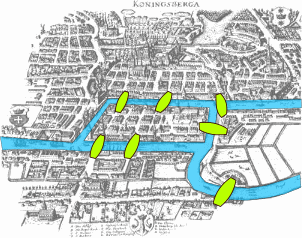

In [ ]:
from IPython.display import Image, SVG
Image("https://upload.wikimedia.org/wikipedia/commons/5/5d/Konigsberg_bridges.png")

Il a essayé plein de fois et n'a jamais réussi à trouver une solution. Euler a cherché une explication. Puisque ce n'est pas possible, essayer de comprendre pourquoi ce n'est pas possible. Il s'est aperçu que bien souvent, il se retrouvait coincé dans l'île du milieu car il ne pouvait pas en sortir sans repasser par un pont qu'il avait déjà emprunté. Nécessairement, lorsqu'on y arrive par un pont, il faut en repartir par un autre pont. Or il y a cinq ponts. On y arrive une fois (1 pont), on en repart (2 ponts), on y revient (3 ponts), on repart encore (4 ponts) et on revient enfin (5 ponts). On ne peut plus repartir. Donc, à chaque fois qu'on arrive, il faut repartir. Cela fait deux ponts. Il faudrait que l'île soit reliée par 4 ponts ou 6 ponts ou plus généralement un [nombre pair](https://fr.wikipedia.org/wiki/Parit%C3%A9_(arithm%C3%A9tique)) de ponts.

Et il a trouvé la parade : il faut démarrer de l'île du milieu et le problème est résolu. C'est ce qu'il a fait. Pourtant, quelques promenades plus tard, il s'est rendu à l'évidence, ce n'est pas possible. Mais pourquoi ?

Et on considérait que la ville est composée uniquement d'île reliées par des ponts, soit 4 îles reliées par 7 ponts.

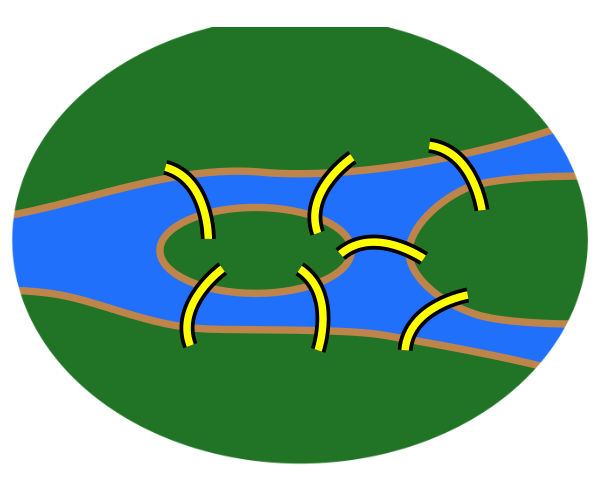

In [ ]:
SVG("https://upload.wikimedia.org/wikipedia/commons/9/91/7_bridges.svg")

De façon encore plus schématique :

In [ ]:
SVG("https://upload.wikimedia.org/wikipedia/commons/9/96/K%C3%B6nigsberg_graph.svg")

Et maintenant comptons le nombre de ponts reliés à chaque île ?

Incroyable, il y a un nombre impairs de ponts pour chaque île. Cela voudrait dire qu'il faudrait démarrer de chaque île et ce n'est vraiment pas possible. *Euler* a ainsi démontré que **pour qu'il existe un chemin qui passe par tous les ponts (ou *arcs*), il faut que toutes les îles (ou *noeuds*) soit reliées avec les autres par un nombre pair de ponts excepté deux îles au plus pour le début et la fin du parcours**.

Revenons à notre problème de départ. On redessine le même graphique en indiquant les îles (ou *carrefour*) avec un nombre de ponts (ou *rues*) impair.

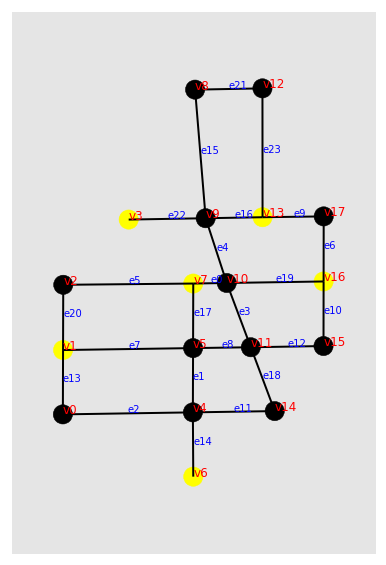

In [ ]:
plot_streets_network(edges_index, edges, vertices, shapes, figsize=(10,10), color_vertices="odd", size_c=15)

Il y en a 6. Il n'existe donc pas de chemins passant pour toutes les rues une et une seule fois.

## La résolution du problème

Qu'à cela ne tienne ! Puisqu'il n'existe pas de solution passant par toutes les rues une et une seule fois, que faire pour qu'elle existe ? C'est simple, il suffit de rajouter des ponts et que ces ponts soient les plus courts possibles. Nous allons relier les carrefour (v13, v16) et (v1, v7). Et pour ajouter un pont, c'est comme si nous repassions par certaines rues.

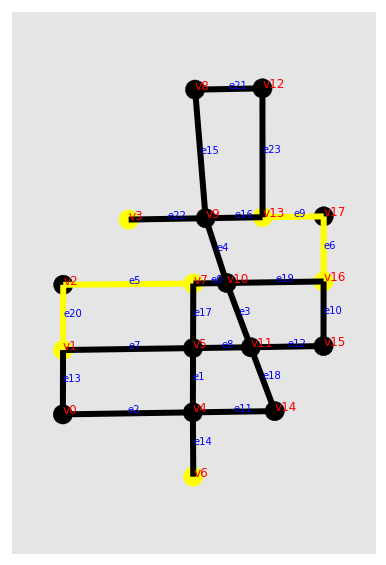

In [ ]:
plot_streets_network(edges_index, edges, vertices, shapes, figsize=(10,10), color_vertices="odd", size_c=15, size_e=6,
                     color_edges={i:"yellow" for i in (20, 5, 6, 9)})

En jaune, ce sont les rues dans lesquelles il faudra passer deux fois. En dédoublant ces rues, nous enlevons deux carrefours (ou îles) connectées avec un nombre impair de rues. On sait maintenant qu'il existe un chemin qui passe par toutes les rues au moins une fois. Le graphe suivant montre un exemple de parcours possible.

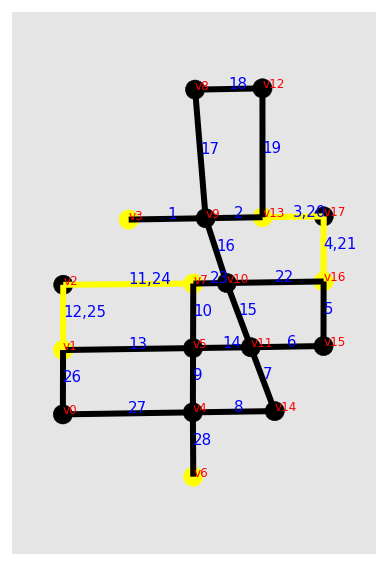

In [ ]:
from ensae_projects.challenge.city_tour import euler_path
order = euler_path(edges_index, edges, solution=edges_index + [20, 5, 6, 9])
plot_streets_network(edges_index, edges, vertices, shapes, figsize=(10,10), color_vertices="odd", size_c=15, size_e=6,
                     color_edges={i:"yellow" for i in (20, 5, 6, 9)}, order=order, size_et=15)

## Petite précision mathématique

J'ai affirmé que si chaque carrefour (ou île ou noeud) était relié à un nombre pair de rues (ou ponts ou arcs), il existait un chemin passant une et une seule fois par toutes les rues. Ceci n'est pas tout-à-fait vrai. Nous avons seulement montré que si cette condition était fausse, alors ce chemin n'existait pas. Ou autrement dit, si un tel chemin existe, alors cette condition est nécessairement vrai. C'est une **condition nécessaire**. Nous n'avons pas montré que cette condition est **suffisante** : si cette condition est vraie, alors le chemin existe.

Pour montrer que la condition est suffisante, il suffit de montrer qu'il existe un moyen infaillible de construire un chemin qui passe par toutes les rues une et une seule fois. Ce n'est pas bien compliqué :

* On part d'un noeud quelconque et on choisit une rue au hasard.
* A chaque carrefour, on choisir une rue au hasard parmi celles qu'on n'a pas visité. C'est toujours possible car on sait qu'elles sont en nombre pair : quand on arrive, il y en a toujours une autre.
* On s'arrête quand on est revenu au point de départ.

Il arrive parfois qu'on revient au point de départ sans avoir parcouru toutes les rues. Ce n'est pas grave. Il suffit d'enlever du graphe toutes les rues déjà parcourues. On obtient un graphe plus petit. Il est facile de montrer que ce graphe plus petit vérifie toujours la condition. Et on recommence le parcours aléatoire précédent. On s'arrête quand on a parcouru toutes les rues.

## Le plus court chemin passant par toutes les rues

Maintenant qu'on a montré comment obtenir un chemin, comment obtenir le plus court ? L'idée est de relier les carrefours impair entre eux avec les ponts les plus courts.

* On calcule toutes les distances entre carrefour impairs avec un algorithme de [Bellman](https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm).
* On apparie le plus efficacement possible les carrefours impairs entre eux le plus efficacement possible avec l'algorithme de [Blossom](https://en.wikipedia.org/wiki/Blossom_algorithm).

Le tour est joué.